In [1]:
import pandas as pd

# read the dataframe
df_2017 = pd.read_csv('data/IPEDS_2019.csv')

# drop the unnecessary columns
df_2017.drop('Unnamed: 0', axis = 1, inplace = True)

df_2017

,UnitID,Name,Percent on any financial aid,Number in financial aid cohort,Average total grant aid,Percent of students awarded Pell grants,Total amount of Pell grant aid awarded,Average amount Pell grant aid awarded,Percent of students awarded federal student loans,Average amount of federal student loans awarded,...,SAT EBRW 25th percentile,SAT EBRW 75th percentile,SAT Math 25th percentile,SAT Math 75th percentile,ACT Composite 25th percentile,ACT Composite 75th percentile,ACT English 25th percentile,ACT English 75th percentile,ACT Math 25th percentile,ACT Math 75th percentile
0,222178,Abilene Christian University,97.0,3525.0,21092.0,26.0,4226334.0,4701.0,51.0,10536.0,...,515.0,630.0,500.0,600.0,21.0,28.0,19.0,28.0,18.0,26.0
1,138558,Abraham Baldwin Agricultural College,86.0,3927.0,5021.0,39.0,7135499.0,4670.0,36.0,5684.0,...,470.0,580.0,460.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0
2,126182,Adams State University,67.0,1958.0,9585.0,41.0,3726086.0,4634.0,54.0,6715.0,...,450.0,550.0,440.0,540.0,17.0,22.0,15.0,21.0,16.0,22.0
3,188429,Adelphi University,88.0,5360.0,20561.0,27.0,6925058.0,4743.0,54.0,6875.0,...,530.0,630.0,530.0,620.0,21.0,27.0,22.0,29.0,19.0,26.0
4,168528,Adrian College,97.0,1782.0,29050.0,35.0,2747214.0,4403.0,86.0,5748.0,...,480.0,580.0,480.0,520.0,19.0,24.0,16.0,24.0,17.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,160904,Xavier University of Louisiana,88.0,2530.0,15476.0,51.0,6851715.0,5271.0,68.0,6376.0,...,510.0,580.0,480.0,580.0,20.0,26.0,20.0,27.0,18.0,25.0
806,197708,Yeshiva University,86.0,2829.0,28175.0,15.0,1968004.0,4598.0,21.0,6214.0,...,590.0,700.0,560.0,690.0,24.0,30.0,24.0,33.0,23.0,30.0
807,217059,York College of Pennsylvania,89.0,4038.0,9672.0,25.0,4646415.0,4555.0,66.0,6678.0,...,500.0,600.0,500.0,610.0,19.0,25.0,18.0,24.0,19.0,25.0
808,141361,Young Harris College,100.0,1402.0,17978.0,23.0,1589091.0,4966.0,40.0,9567.0,...,490.0,580.0,460.0,550.0,18.0,23.0,16.0,23.0,16.0,22.0


In [2]:
# encode the state column
df_2017 = pd.get_dummies(df_2017, columns = ['State'])

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

# initalize the x and y variables
x = df_2017.loc[:, 'Percent on any financial aid':'Enrolled part time total'].values
y = df_2017.loc[:, 'ACT Composite 75th percentile'].values

#initialize Random Forest Regressor and cross validation
rf_reg = RandomForestRegressor(max_depth=5)
kfold = KFold(n_splits = 10)

y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data
    x_test = x[test_idx, :]
    
    # fit data
    rf_reg = rf_reg.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_reg.predict(x_test)



In [75]:
from sklearn.metrics import r2_score

# get r^2
r2_score(y_true=y, y_pred=y_pred)

0.7028322527602553

In [76]:
import matplotlib.pyplot as plt

def plot_feat_import(feat_list, feat_import, title, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.title(title)
    plt.xlabel('Mean decrease in R^2 across all Decision Trees')

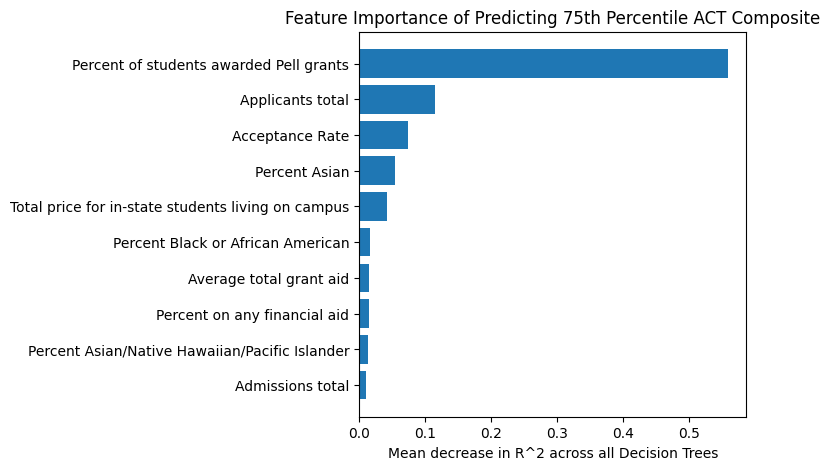

In [77]:
x_feat_list = df_2017.loc[:, 'Percent on any financial aid':'Enrolled part time total'].columns

# plot the feature importances
plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = 'Feature Importance of Predicting 75th Percentile ACT Composite', 
                 limit = 10)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np


df_2017_x = df_2017.drop(['Applicants total', 'Admissions total', 'Enrolled total', 
                            'Acceptance Rate', 'Enrolled full time total', 'Enrolled part time total'], axis = 1)

# initalize the x and y variables
x = df_2017_x.loc[:, 'Percent on any financial aid':'ACT Math 75th percentile'].values
y = df_2017.loc[:, 'Acceptance Rate'].values

#initialize Random Forest Regressor and cross validation
rf_reg = RandomForestRegressor(max_depth=5)
kfold = KFold(n_splits = 10)

y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data
    x_test = x[test_idx, :]
    
    # fit data
    rf_reg = rf_reg.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_reg.predict(x_test)



In [4]:
from sklearn.metrics import r2_score

# get r^2
r2_score(y_true=y, y_pred=y_pred)

0.3624531480992049

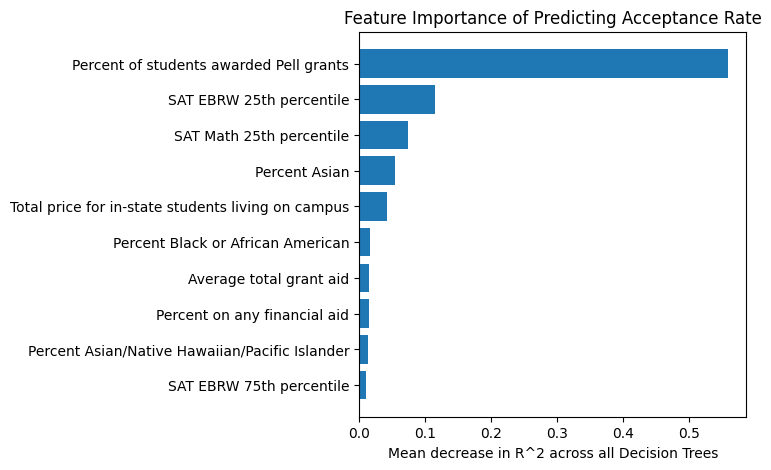

In [79]:
x_feat_list = df_2017_x.loc[:, 'Percent on any financial aid':'ACT Math 75th percentile'].columns

# plot the feature importances
plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = 'Feature Importance of Predicting Acceptance Rate', limit = 10)